In [1]:
from urllib import urlencode
import urllib2
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# #The individual frame; first page of startups on angellist site

In [2]:
#loop through pages(here two) and extract the startups/individ fields info and add to DF;
#does not matter what page it comes from
urls = 'https://api.angel.co/1/startups?filter=raising&page='
fields = ['id','name','created_at','high_concept','quality','updated_at','company_url',
          'video_url','twitter_url','linkedin_url','facebook_url','thumb_url','blog_url',
          'community_profile','product_desc','launch_date','hidden','follower_count',
          'angellist_url',
          'logo_url','company_size']
l=list()
for i in range(1,2):
    r = requests.get(urls+str(i))
    t = r.json()
    startups = t['startups']
    for j in range(0,len(startups)):
        comp = startups[j]
        l.append(comp)
indiv = pd.DataFrame(l,columns = fields)
         
#this works perfectly
#same thing for the composed fields dataframes,
#uniquely identified by company field and name

In [6]:
#Now get the fundraising data frame

In [ ]:
urls = 'https://api.angel.co/1/startups?filter=raising&page='
l=list()
for i in range(1,9):
    r = requests.get(urls+str(i))
    t = r.json()
    startups = t['startups']
    for j in range(0,len(startups)):
        comp = startups[j]
        d = comp['fundraising']
        d['name']=comp['name']
        d['id']=comp['id']
        l.append(d)
fund = pd.DataFrame(l)
#this works very well in a minute or so to extract the fundraising dataframe

In [289]:
fund.shape

(400, 10)

In [189]:
indiv.columns

Index([u'id', u'name', u'created_at', u'high_concept', u'quality', u'updated_at', u'company_url', u'video_url', u'twitter_url', u'linkedin_url', u'facebook_url', u'thumb_url', u'blog_url', u'community_profile', u'product_desc', u'launch_date', u'hidden', u'follower_count', u'angellist_url', u'logo_url', u'company_size'], dtype='object')

In [288]:
indiv.shape

(400, 21)

In [191]:
indiv.head()

,id,name,created_at,high_concept,quality,updated_at,company_url,video_url,twitter_url,linkedin_url,...,thumb_url,blog_url,community_profile,product_desc,launch_date,hidden,follower_count,angellist_url,logo_url,company_size
0,389582,CoffeetheApp,2014-04-29T20:07:33Z,Professional Networking for Jobs,4,2014-12-16T17:08:52Z,http://coffeetheapp.com,https://www.youtube.com/watch?v=4ShUlSzxwWg,https://twitter.com/coffeetheapp,https://www.linkedin.com/company/5078073?trk=p...,...,https://d1qb2nb5cznatu.cloudfront.net/startups...,,False,Coffeetheapp is a mobile community of hiring m...,2014-07-01,False,48,https://angel.co/coffeetheapp,https://d1qb2nb5cznatu.cloudfront.net/startups...,1-10
1,293071,Wear My Tags,2013-11-11T23:09:59Z,Fashion Sourcing Made Easy!,6,2014-12-17T05:38:42Z,http://wearmytags.com/development/,https://www.youtube.com/watch?v=44Xj8bRnoWA&fe...,https://twitter.com/WearMyTags,,...,https://d1qb2nb5cznatu.cloudfront.net/startups...,,False,WearMyTags.com solves the fashion/apparel indu...,2014-07-01,False,97,https://angel.co/wear-my-tags,https://d1qb2nb5cznatu.cloudfront.net/startups...,1-10
2,235684,The Cherry Share,2013-07-17T11:31:00Z,your way to find the healthiest and best price...,5,2014-12-17T01:51:15Z,http://www.thecherryshare.com/,http://www.youtube.com/watch?v=8QJQ9F8atOQ&fea...,http://twitter.com/foodlve,,...,https://d1qb2nb5cznatu.cloudfront.net/startups...,http://www.thecherryshare.com/,False,The Cherry Share is a mobile and web applicati...,2012-06-01,False,36,https://angel.co/the-cherry-share,https://d1qb2nb5cznatu.cloudfront.net/startups...,1-10
3,144128,Vidinterest,2012-12-05T11:47:08Z,Online Video Discovery & Promotion Platform,4,2014-12-12T19:54:29Z,http://vidinterest.tv,,http://twitter.com/vidinterest,,...,https://d1qb2nb5cznatu.cloudfront.net/startups...,http://blog.vidinterest.com,False,Vidinterest lets you discover and create priva...,2012-06-01,False,19,https://angel.co/vidinterest,https://d1qb2nb5cznatu.cloudfront.net/startups...,1-10
4,355204,UberOnTime.com,2014-03-05T18:58:10Z,On Demand Postman,4,2014-12-11T16:16:46Z,http://uberontime.com,,http://twitter.com/uberontime,,...,https://d1qb2nb5cznatu.cloudfront.net/startups...,http://uberontime.com/blog,False,On-demand postman delivers packages locally. ...,2014-06-01,False,5,https://angel.co/uberontime-com,https://d1qb2nb5cznatu.cloudfront.net/startups...,1-10


In [28]:
#create new variables in indiv df based on presence or absence of links

In [290]:
indiv['website'] = (indiv['company_url'].fillna('')) != '' 
#this checks for Nan and none and blanks but not for incomplete or incorrect

In [117]:
#same check for facebook_url

In [291]:
indiv['facebook']= (indiv['facebook_url'].fillna('')) != ''

In [119]:
#check for linkedin link

In [292]:
indiv['linkedin'] = (indiv['linkedin_url'].fillna('')) != ''

In [124]:
#check for twitter link

In [293]:
indiv['twitter'] = (indiv['twitter_url'].fillna('')) != ''

In [294]:
indiv['blog'] = (indiv['blog_url'].fillna('')) != ''

In [140]:
#create new data frame with a combination of columns from indiv and fund; 
#first merge the two by company id;

In [295]:
df_merged = pd.merge(indiv,fund, on = 'id', how = 'outer')

In [296]:
df_merged.shape

(400, 35)

In [297]:
df_merged.head()

,id,name_x,created_at,high_concept,quality,updated_at_x,company_url,video_url,twitter_url,linkedin_url,...,blog,discount,equity_basis,name_y,pre_money_valuation,public,raised_amount,raising_amount,round_opened_at,updated_at_y
0,389582,CoffeetheApp,2014-04-29T20:07:33Z,Professional Networking for Jobs,4,2014-12-16T17:08:52Z,http://coffeetheapp.com,https://www.youtube.com/watch?v=4ShUlSzxwWg,https://twitter.com/coffeetheapp,https://www.linkedin.com/company/5078073?trk=p...,...,False,NaN,equity,CoffeetheApp,3000000,True,0,250000,2014-12-15,2014-12-15T19:55:19Z
1,293071,Wear My Tags,2013-11-11T23:09:59Z,Fashion Sourcing Made Easy!,6,2014-12-17T05:38:42Z,http://wearmytags.com/development/,https://www.youtube.com/watch?v=44Xj8bRnoWA&fe...,https://twitter.com/WearMyTags,,...,False,NaN,equity,Wear My Tags,NaN,True,0,750000,2014-12-14,2014-12-17T01:58:36Z
2,235684,The Cherry Share,2013-07-17T11:31:00Z,your way to find the healthiest and best price...,5,2014-12-17T01:51:15Z,http://www.thecherryshare.com/,http://www.youtube.com/watch?v=8QJQ9F8atOQ&fea...,http://twitter.com/foodlve,,...,True,NaN,equity,The Cherry Share,3000000,True,91000,400000,2014-12-14,2014-12-14T06:20:03Z
3,144128,Vidinterest,2012-12-05T11:47:08Z,Online Video Discovery & Promotion Platform,4,2014-12-12T19:54:29Z,http://vidinterest.tv,,http://twitter.com/vidinterest,,...,True,NaN,equity,Vidinterest,1000000,True,0,100000,2014-12-12,2014-12-12T19:58:06Z
4,355204,UberOnTime.com,2014-03-05T18:58:10Z,On Demand Postman,4,2014-12-11T16:16:46Z,http://uberontime.com,,http://twitter.com/uberontime,,...,True,NaN,equity,UberOnTime.com,1000000,True,0,100000,2014-12-11,2014-12-11T16:12:13Z


In [201]:
df_merged.columns

Index([u'id', u'name_x', u'created_at', u'high_concept', u'quality', u'updated_at_x', u'company_url', u'video_url', u'twitter_url', u'linkedin_url', u'facebook_url', u'thumb_url', u'blog_url', u'community_profile', u'product_desc', u'launch_date', u'hidden', u'follower_count', u'angellist_url', u'logo_url', u'company_size', u'website', u'facebook', u'linkedin', u'twitter', u'blog', u'discount', u'equity_basis', u'name_y', u'pre_money_valuation', u'public', u'raised_amount', u'raising_amount', u'round_opened_at', u'updated_at_y'], dtype='object')

In [145]:
#get the dataframe to be used for meetup analytics, visualiz and scikit learn

In [298]:
ana = df_merged[['id','name_x','high_concept','product_desc','launch_date','created_at',
                 'follower_count','quality','company_size','twitter','linkedin','facebook',
                 'website','blog','discount','equity_basis','pre_money_valuation',
                 'raised_amount',
                 'round_opened_at','raising_amount']]

In [299]:
del indiv

In [300]:
del fund

In [301]:
del df_merged

In [302]:
ana.head()

,id,name_x,high_concept,product_desc,launch_date,created_at,follower_count,quality,company_size,twitter,linkedin,facebook,website,blog,discount,equity_basis,pre_money_valuation,raised_amount,round_opened_at,raising_amount
0,389582,CoffeetheApp,Professional Networking for Jobs,Coffeetheapp is a mobile community of hiring m...,2014-07-01,2014-04-29T20:07:33Z,48,4,1-10,True,True,True,True,False,NaN,equity,3000000,0,2014-12-15,250000
1,293071,Wear My Tags,Fashion Sourcing Made Easy!,WearMyTags.com solves the fashion/apparel indu...,2014-07-01,2013-11-11T23:09:59Z,97,6,1-10,True,False,False,True,False,NaN,equity,NaN,0,2014-12-14,750000
2,235684,The Cherry Share,your way to find the healthiest and best price...,The Cherry Share is a mobile and web applicati...,2012-06-01,2013-07-17T11:31:00Z,36,5,1-10,True,False,True,True,True,NaN,equity,3000000,91000,2014-12-14,400000
3,144128,Vidinterest,Online Video Discovery & Promotion Platform,Vidinterest lets you discover and create priva...,2012-06-01,2012-12-05T11:47:08Z,19,4,1-10,True,False,True,True,True,NaN,equity,1000000,0,2014-12-12,100000
4,355204,UberOnTime.com,On Demand Postman,On-demand postman delivers packages locally. ...,2014-06-01,2014-03-05T18:58:10Z,5,4,1-10,True,False,False,True,True,NaN,equity,1000000,0,2014-12-11,100000


In [207]:
ana.columns

Index([u'id', u'name_x', u'high_concept', u'product_desc', u'launch_date', u'created_at', u'follower_count', u'quality', u'company_size', u'twitter', u'linkedin', u'facebook', u'website', u'blog', u'discount', u'equity_basis', u'pre_money_valuation', u'raised_amount', u'round_opened_at', u'raising_amount'], dtype='object')

In [155]:
#create precentage_raised column = raised_amount/raising_amount

In [303]:
ana['percentage_raised'] = 100*ana['raised_amount']/ana['raising_amount']

In [159]:
#response variable can be = percentage_raised or, for classifier, percentage_raised > 0; 
# =0; > 100 (if we want three categories)

In [34]:
#now get column "days since round open" and column "days since launched"

#First need to parse strings into datetime objects and then apply the delta operator for temporal difference between two datetime objects

#use the pandas to_datetime; NaT is (not a time) for missing data

In [304]:
launch_d=pd.to_datetime(ana['launch_date'])

In [305]:
created = pd.to_datetime(ana['created_at'])

In [306]:
d = pd.to_datetime(ana['round_opened_at'])

In [307]:
d.head()

0   2014-12-15
1   2014-12-14
2   2014-12-14
3   2014-12-12
4   2014-12-11
Name: round_opened_at, dtype: datetime64[ns]

In [39]:
#today's date

In [310]:
from datetime import datetime
tod = datetime.now()
print tod

2014-12-17 13:26:35.653000


In [58]:
#number of days between now and launch date

In [311]:
days_since_launch = tod - launch_d
days_since_launch.head()

In [ ]:
#number of days since raising round opened

In [313]:
days_since_round = tod - d
days_since_round.head()

0   2 days, 13:26:35.653000
1   3 days, 13:26:35.653000
2   3 days, 13:26:35.653000
3   5 days, 13:26:35.653000
4   6 days, 13:26:35.653000
Name: round_opened_at, dtype: timedelta64[ns]

In [220]:
days_since_created = tod - created

In [72]:
#get the number of days since launch, created and round opened as numbers not timedelta objects

In [314]:
ana['days_launch'] = days_since_launch.astype('timedelta64[D]')
ana['days_r'] = days_since_round.astype('timedelta64[D]')
ana['days_created'] = days_since_created.astype('timedelta64[D]')


In [223]:
#Create a temporary local copy of the data for analysis

In [315]:
ana.to_pickle('ana_pickled')

In [316]:
del ana

In [167]:
#load pickle for analysis

In [2]:
ana = pd.read_pickle('ana_pickled')

In [84]:
#ANALYTICS

In [3]:
ana.describe()

,id,follower_count,quality,twitter,linkedin,facebook,website,blog,discount,pre_money_valuation,raised_amount,raising_amount,percentage_raised,days_launch,days_r,days_created
count,400.000000,400.000000,400.000000,400,400,400,400,400,53.000000,2.450000e+02,400.000000,4.000000e+02,400.000000,128.000000,400.000000,200.000000
mean,361130.905000,23.810000,3.025000,0.46,0.1525,0.2475,0.9975,0.2325,17.849057,1.668349e+07,35829.377500,1.572787e+06,3.542742,482.140625,165.277500,375.850000
std,99434.201323,73.550923,1.693086,0.4990216,0.3599551,0.4321001,0.05,0.4229551,8.244803,2.038386e+08,228628.002403,1.126272e+07,13.780317,490.235613,55.494772,287.841207
min,1447.000000,0.000000,1.000000,False,False,False,False,False,0.000000,0.000000e+00,0.000000,1.000000e+01,0.000000,-196.000000,2.000000,154.000000
25%,346012.500000,3.000000,2.000000,0,0,0,1,0,15.000000,2.500000e+05,0.000000,8.000000e+04,0.000000,222.250000,166.750000,178.000000
50%,406998.000000,5.000000,3.000000,0,0,0,1,0,20.000000,1.700000e+06,0.000000,2.500000e+05,0.000000,350.000000,187.000000,231.000000
75%,417614.750000,15.000000,4.000000,1,0,0,1,0,20.000000,4.500000e+06,0.000000,6.000000e+05,0.000000,541.500000,202.000000,451.750000
max,438675.000000,863.000000,9.000000,True,True,True,True,True,40.000000,3.192118e+09,3760250.000000,1.600000e+08,110.595588,3272.000000,215.000000,1468.000000


In [319]:
ana['percentage_raised'].describe(percentiles=[0.5,0.6,0.65,0.7,0.75,0.80,0.85,0.9,0.95,0.99,1]) 

count    400.000000
mean       3.542742
std       13.780317
min        0.000000
50%        0.000000
60%        0.000000
65%        0.000000
70%        0.000000
75%        0.000000
80%        0.000000
85%        0.000000
90%        6.066667
95%       22.812500
99%       79.207000
100%     110.595588
max      110.595588
dtype: float64

In [2]:
#it seems that majority did not raise anything, but some raised more than "raising_amount";
#interesting to see characteristics
#for those ones

In [320]:
pd.value_counts(ana['website'])

True     399
False      1
dtype: int64

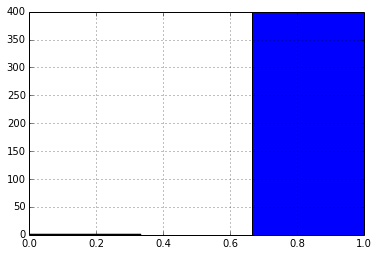

In [321]:
ana['website'].hist(bins = 3)

In [231]:
pd.value_counts(ana['blog'])

False    139
True      61
dtype: int64

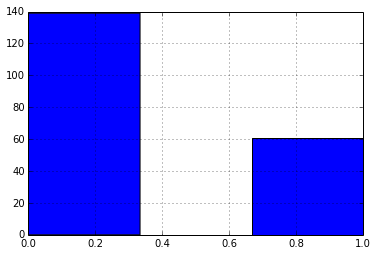

In [232]:
ana['blog'].hist(bins = 3)

In [233]:
pd.value_counts(ana['linkedin'])

False    156
True      44
dtype: int64

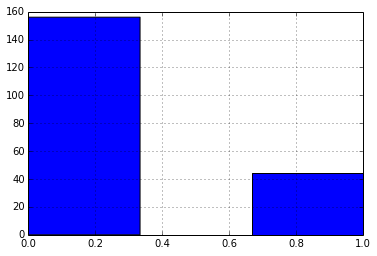

In [234]:
ana['linkedin'].hist(bins = 3)

In [235]:
pd.value_counts(ana['facebook'])

False    126
True      74
dtype: int64

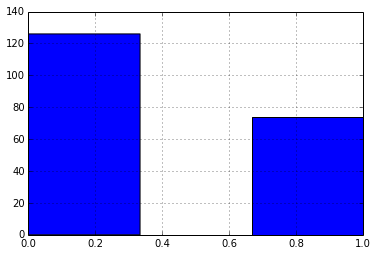

In [236]:
ana['facebook'].hist(bins = 3)

In [237]:
pd.value_counts(ana['twitter'])

True     116
False     84
dtype: int64

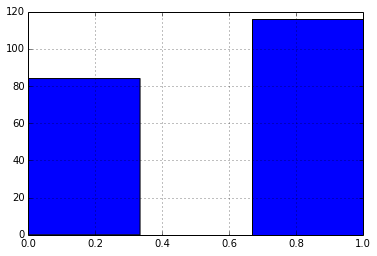

In [238]:
ana['twitter'].hist(bins = 3)

In [24]:
#Visualizations (more)

In [25]:
#Distribution of percentage raised

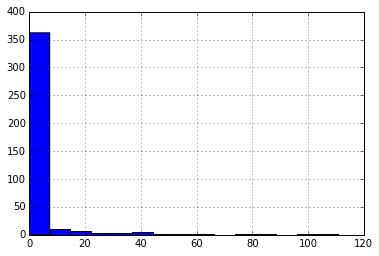

In [322]:
ana['percentage_raised'].hist(bins=15)

In [ ]:
#percentage raised vs number of days since round open

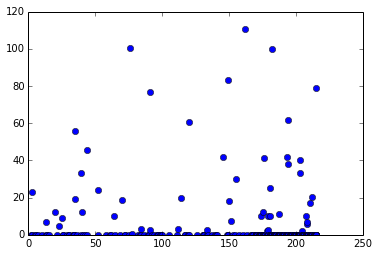

In [323]:
plt.plot(ana['days_r'],ana['percentage_raised'],'bo')

In [ ]:
#Plot percentage raised( y axis) vs number of days since company launch (x axis)

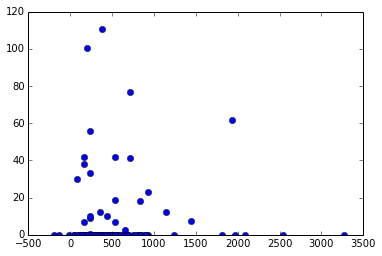

In [324]:
plt.plot(ana['days_launch'],ana['percentage_raised'],'bo')

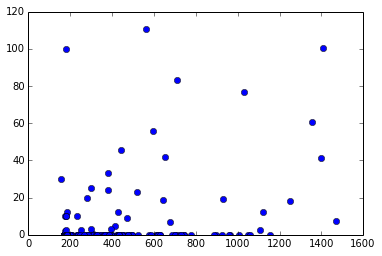

In [325]:
plt.plot(ana['days_created'],ana['percentage_raised'],'bo')

In [99]:
#percentage raised vs quality of the company (variable specific to Angellist site)

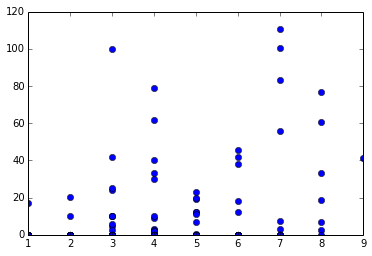

In [326]:
plt.plot(ana['quality'],ana['percentage_raised'],'bo')

In [80]:
#percentage raised vs discount of the company (variable specific to Angellist site)

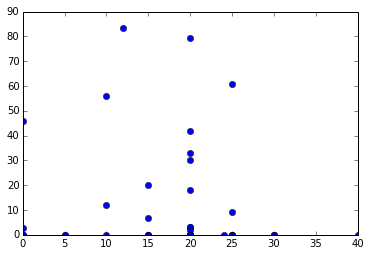

In [327]:
plt.plot(ana['discount'],ana['percentage_raised'],'bo')

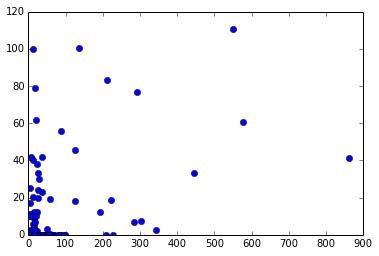

In [328]:
plt.plot(ana['follower_count'],ana['percentage_raised'],'bo')

In [329]:
pre_m = ana['pre_money_valuation']/1000

In [330]:
pre_m.describe()

count        245.000000
mean       16683.489216
std       203838.602312
min            0.000000
25%          250.000000
50%         1700.000000
75%         4500.000000
max      3192118.227000
dtype: float64

In [335]:
p1 = ana['pre_money_valuation'] < 3000000

In [336]:
pre_m_lower = ana[p1]['pre_money_valuation']

In [337]:
pre_m_lower.describe()

count        160.00000
mean      855041.44375
std       847131.43358
min            0.00000
25%        50000.00000
50%       600000.00000
75%      1500000.00000
max      2800000.00000
dtype: float64

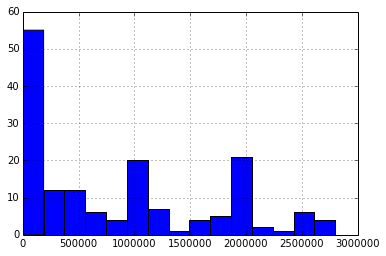

In [338]:
pre_m_lower.hist(bins=15)

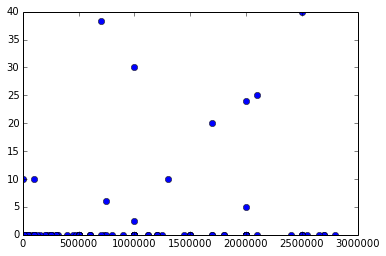

In [339]:
plt.plot(ana[p1]['pre_money_valuation'],ana[p1]['percentage_raised'],'bo')

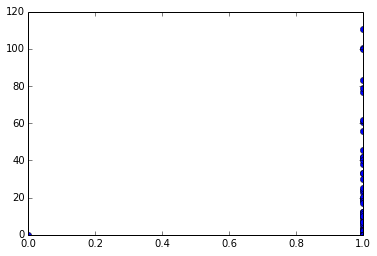

In [340]:
plt.plot(ana['website'],ana['percentage_raised'],'bo')

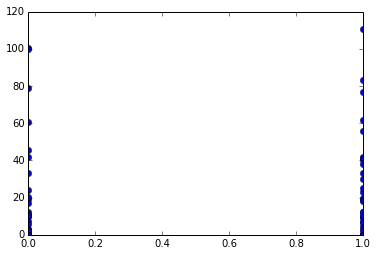

In [341]:
plt.plot(ana['facebook'],ana['percentage_raised'],'bo')

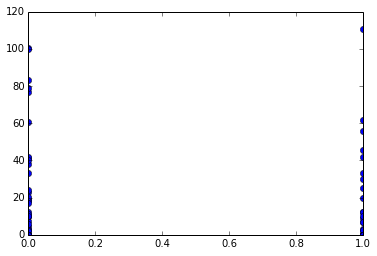

In [342]:
plt.plot(ana['linkedin'],ana['percentage_raised'],'bo')

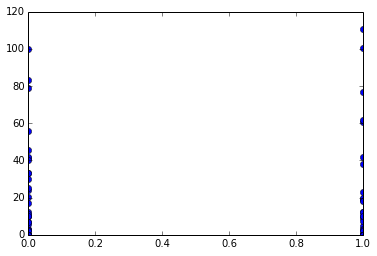

In [344]:
plt.plot(ana['blog'],ana['percentage_raised'],'bo')

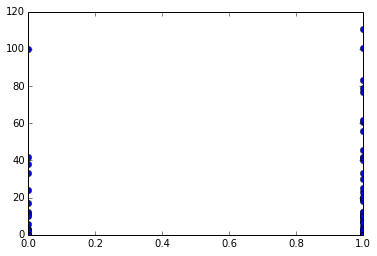

In [345]:
plt.plot(ana['twitter'],ana['percentage_raised'],'bo')

In [109]:
#Create the boolean variable raise = 0 if the company raised 0% and raise = 1 if the company raised more than 0%; 

In [346]:
target = ana['percentage_raised'] > 0

In [114]:
#Implement a logistic regression classification algorithm to see how well we can use 
#the following features to predict if the company will raise something or nothing

In [115]:
#Use Scikit-Learn Python libraries for model implementation

In [347]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [117]:
#We know the true classification for our data; will first create another dataset with the 
#features of interest 
#and then take a train and test set

In [348]:
features = ['website', 'blog' , 'linkedin', 'facebook', 'twitter','days_launch','days_created',
            'days_r','follower_count','quality']

In [349]:
data = ana[features]

In [350]:
del ana

In [124]:
#Create test and train set

In [351]:
from sklearn.cross_validation import train_test_split

In [352]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, 
                                                    random_state=33)

In [353]:
del data

In [354]:
del target

In [355]:
X_train.shape, y_train.shape

((300L, 10L), (300L,))

In [356]:
X_test.shape, y_test.shape

((100L, 10L), (100L,))

In [135]:
#fit classification model with training data; first deal with missing values

In [357]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

In [358]:
imp.fit(X_train)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [359]:
X_train_imp = imp.transform(X_train)

In [360]:
del X_train

In [361]:
model = LogisticRegression()
m = model.fit(X_train_imp, y_train)

In [362]:
m

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [363]:
m.coef_

array([[ -1.18947911e+00,   1.71814396e-01,   5.61057452e-01,
          1.02474909e-01,   3.86547994e-01,   1.83987118e-04,
         -1.65509435e-03,  -6.27958267e-03,   1.07225575e-02,
          3.36200353e-01]])

In [364]:
exp(m.coef_) #exponential of coefficients is odds of increase in probability
# of raising due to increase in one of the features

array([[ 0.30437977,  1.18745742,  1.75252473,  1.1079095 ,  1.47189104,
         1.000184  ,  0.99834627,  0.99374009,  1.01078025,  1.39961942]])

In [152]:
#Can look at the relative importance of features through their odds ratios (can eyeball)
#features = ['website', 'blog' , 'linkedin', 'facebook', 'twitter','days_launch','days_created',
# 'days_r','follower_count','quality']

In [365]:
# make predictions using train data
predicted = m.predict(X_train_imp)

In [366]:
# summarize the fit of the model using train data
print(metrics.classification_report(y_train, predicted))
print(metrics.confusion_matrix(y_train, predicted))

             precision    recall  f1-score   support

      False       0.90      0.98      0.94       261
       True       0.62      0.26      0.36        39

avg / total       0.86      0.88      0.86       300

[[255   6]
 [ 29  10]]


In [367]:
# imput test data; using imputation means from train data
X_test_imp = imp.transform(X_test)

In [368]:
del X_test

In [369]:
# make predictions using train data
predicted = m.predict(X_test_imp)

In [370]:
# summarize the fit of the model using test data
print(metrics.classification_report(y_test, predicted))


             precision    recall  f1-score   support

      False       0.92      0.98      0.95        89
       True       0.60      0.27      0.37        11

avg / total       0.88      0.90      0.88       100



In [371]:
print(metrics.confusion_matrix(y_test, predicted))

[[87  2]
 [ 8  3]]


In [372]:
metrics.accuracy_score(y_test, predicted)

0.90000000000000002